In [90]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2022-10-05 17:12:51.598730: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-05 17:12:51.599044: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [94]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os, cv2
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import tensorflow as tf

In [92]:
IMAGE_SIZE = [224, 224]

base_dir = "/Users/sanidhyasingh/Desktop/gangajal/datathonindoml-2022"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


In [99]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False
    
x = Flatten()(inception.output)

prediction = Dense(16, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.summary()

In [101]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [102]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [103]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 28000 images belonging to 16 classes.


In [104]:
test_set = test_datagen.flow_from_directory(validation_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 16 classes.


In [ ]:
hist = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

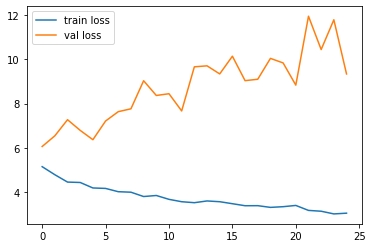

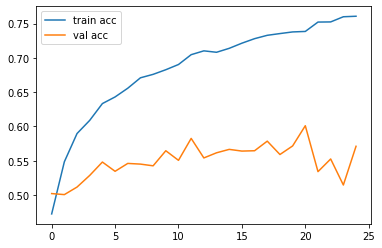

<Figure size 432x288 with 0 Axes>

In [107]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [4]:
# test_input = []
# for i in range(17801,18701):
#     img = image.load_img("/Users/sanidhyasingh/Desktop/gangajal/datathonindoml-2022/test/" + str(i) + ".tif", target_size = (224,224))
#     x=image.img_to_array(img)
#     x/=255
#     test_input.append(x)
# test_input = np.array(test_input)
# test_input.shape


In [5]:
# y_pred = model.predict(test_input)

In [110]:
# import numpy as np
# y_pred = np.argmax(y_pred, axis=1)

In [6]:
# y_pred

In [112]:
# ids = []
# for i in range(17801,18701):
#     ids.append(i)

In [114]:
# import pandas as pd

In [7]:
# df.groupby('label').count()

In [176]:
# class_names = []
# for i in range(16):
#     class_names.append(str(i))

In [3]:
# for i in class_names:
#     os.makedirs(os.path.join('/Users/sanidhyasingh/Desktop/gangajal/datathonindoml-2022/result',i))

In [135]:
# import shutil
# for i in class_names: 
#     for c in list(df[df['label']== int(i)]['id']): 
#         get_image = os.path.join('/Users/sanidhyasingh/Desktop/gangajal/datathonindoml-2022/test', str(c)+ '.tif')
#         if not os.path.exists('/Users/sanidhyasingh/Desktop/gangajal/datathonindoml-2022/result'+ str(c) + i):
#              move_image = shutil.copy(get_image,'/Users/sanidhyasingh/Desktop/gangajal/datathonindoml-2022/result/'+ i)
                

In [177]:
# ids = []
# labels = []
# dirc = "/Users/sanidhyasingh/Desktop/gangajal/datathonindoml-2022/result"

In [8]:
# print(class_names)

In [179]:
# import shutil
# for i in class_names: 
#     temp_dirc = os.path.join(dirc,i)
#     for root, dirs, files in os.walk(temp_dirc):
#         for filename in files:
#             if not filename == ".DS_Store":
#                 labels.append(int(i))
#                 ids.append(int(filename[0:5]))

In [181]:
# data1 = {'id' : ids, 'label' : labels}

In [186]:
# for i in range(900):
#     if data1['label'][i] == 1:
#         data1['label'][i] = 7
#     elif data1['label'][i] == 2:
#         data1['label'][i] = 5
#     elif data1['label'][i] == 9:
#         data1['label'][i] = 3
#     elif data1['label'][i] == 3:
#         data1['label'][i] = 11
#     elif data1['label'][i] == 4:
#         data1['label'][i] = 6
#     elif data1['label'][i] == 10:
#         data1['label'][i] = 4
#     elif data1['label'][i] == 5:
#         data1['label'][i] = 12
#     elif data1['label'][i] == 6:
#         data1['label'][i] = 14
#     elif data1['label'][i] == 11:
#         data1['label'][i] = 1
#     elif data1['label'][i] == 7:
#         data1['label'][i] = 15
#     elif data1['label'][i] == 8:
#         data1['label'][i] = 2
#     elif data1['label'][i] == 12:
#         data1['label'][i] = 13
#     elif data1['label'][i] == 13:
#         data1['label'][i] = 10
#     elif data1['label'][i] == 14:
#         data1['label'][i] = 8
#     elif data1['label'][i] == 15:
#         data1['label'][i] = 9

In [187]:
# df1 = pd.DataFrame(data1)

In [188]:
# df1.head(100)

,id,label
0,18650,0
1,18532,0
2,18295,0
3,18256,0
4,18691,0
...,...,...
95,18433,7
96,17885,7
97,18032,7
98,18153,7


In [189]:
# df1.sort_values("id")

,id,label
601,17801,4
335,17802,6
602,17803,4
809,17804,8
527,17805,3
...,...,...
90,18696,7
740,18697,8
480,18698,2
528,18699,3


In [191]:
# df1.to_csv('predicted_labels.csv', index = False)